<a href="https://colab.research.google.com/github/SwaXTech/Simulacion-EaE/blob/main/tp6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico #6



In [1]:
#@title Imports de bibliotecas necesarias
from datetime import datetime
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#@title Definición de funciones
def graph(dictionary, name):
  objects = dictionary.keys()
  y_pos = np.arange(len(objects))
  values = dictionary.values()

  plt.figure(figsize=(20, 5))
  plt.bar(y_pos, values, align='edge', width=0.3)
  plt.xticks(y_pos, objects)
  plt.ylabel('Peticiones')
  plt.title(name)

  plt.show()


def calculate_intervals(timestamps_list):
  intervals = []

  i = 1
  while i < len(timestamps_list):
    intervals.append((timestamps_list[i] - timestamps_list[i - 1]).astype('timedelta64[s]').astype(np.int32))
    i += 1

  return intervals


def print_data(dictionary):
  values = np.array(list(dictionary.values()))

  print("Media: %f" % values.mean())
  print("Varianza: %f" %values.var())
  print("Desvío Estandar: %f" %values.std())


In [3]:
#@title Descarga del archivo de TimeStamps
!curl -L -o timestamps.csv -C - 'https://raw.githubusercontent.com/SwaXTech/Simulacion-EaE/main/timestamps.csv'

** Resuming transfer from byte position 656550
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


In [4]:
#@title Carga del archivo de timestamps
serie = pd.read_csv('timestamps.csv')
serie

,TimeStamp
0,09/14/2021 12:00:07
1,09/14/2021 12:00:08
2,09/14/2021 12:00:08
3,09/14/2021 12:00:11
4,09/14/2021 12:00:21
...,...
32822,09/14/2021 11:59:31
32823,09/14/2021 11:59:44
32824,09/14/2021 11:59:47
32825,09/14/2021 11:59:58


In [5]:
#@title Conversión de strings a datetime y separación en am/pm para limpieza y corrección de datos
datetime_serie = serie['TimeStamp'].map(lambda timestamp: datetime.strptime(timestamp, '%m/%d/%Y %H:%M:%S'))
datetime_serie_am = datetime_serie[:11202]
datetime_serie_pm = datetime_serie[11202:]

In [6]:
#@title Separando por hora para conocer cómo se distribuyen las peticiones a lo largo de las horas
dictionary = {}

for date in datetime_serie_am:
  hour = date.hour

  if date.hour == 12:
    hour = 0

  if hour in dictionary.keys():
    dictionary[hour] +=1
  else:
    dictionary[hour] = 0

for date in datetime_serie_pm:
  
  hour = date.hour

  if not date.hour == 12:
     hour += 12

  if hour in dictionary.keys():
    dictionary[hour] +=1
  else:
    dictionary[hour] = 0

print("Peticiones por Hora")
pd.Series(dictionary, name="Peticiones por Hora")

Peticiones por Hora


0      777
1      423
2      283
3      239
4      287
5      408
6      516
7      962
8     1242
9     1555
10    2292
11    2206
12    1954
13    2318
14    2204
15    2319
16    2039
17    2268
18    1909
19    1599
20    1325
21    1369
22    1285
23    1024
Name: Peticiones por Hora, dtype: int64

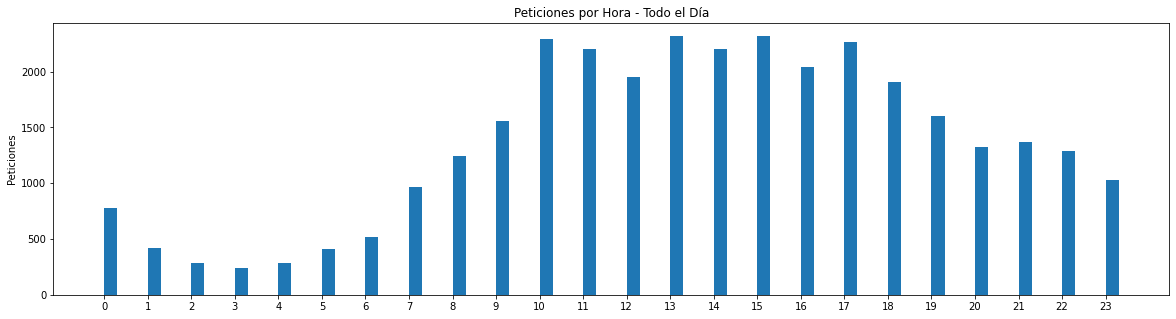

In [7]:
#@title Generación del Histograma
#@markdown Separaremos la función de probabilidad en dos <br>
#@markdown - 9 a 20hs
#@markdown - 20 a 9hs

graph(dictionary, "Peticiones por Hora - Todo el Día")

In [8]:
#@title Media Varianza y Desvío Estandar
print_data(dictionary)

Media: 1366.791667
Varianza: 536018.914931
Desvío Estandar: 732.133127


In [9]:
#@title Reacomodamiento de timestamps

fr_0_9 = datetime_serie[:5145].values
fr_9_19 = datetime_serie[5145:26220].values
fr_19_0 = datetime_serie[26220:].values

intervalos_horario_pico = calculate_intervals(fr_9_19)
intervalos_horario_normal = calculate_intervals(fr_0_9)
intervalos_horario_normal.extend(calculate_intervals(fr_19_0))

dictionary_horario_normal = {}
dictionary_horario_pico = {}

for date in fr_0_9:
  hour = pd.to_datetime(date).hour

  if hour == 12:
    hour = 0

  if hour in dictionary_horario_normal.keys():
    dictionary_horario_normal[hour] +=1
  else:
    dictionary_horario_normal[hour] = 0

for date in fr_19_0:
  hour = pd.to_datetime(date).hour + 12

  if hour in dictionary_horario_normal.keys():
    dictionary_horario_normal[hour] +=1
  else:
    dictionary_horario_normal[hour] = 0

for date in fr_9_19:
  
  hour = pd.to_datetime(date).hour

  if not hour < 7 :
     hour += 12

  if hour in dictionary_horario_pico.keys():
    dictionary_horario_pico[hour] +=1
  else:
    dictionary_horario_pico[hour] = 0

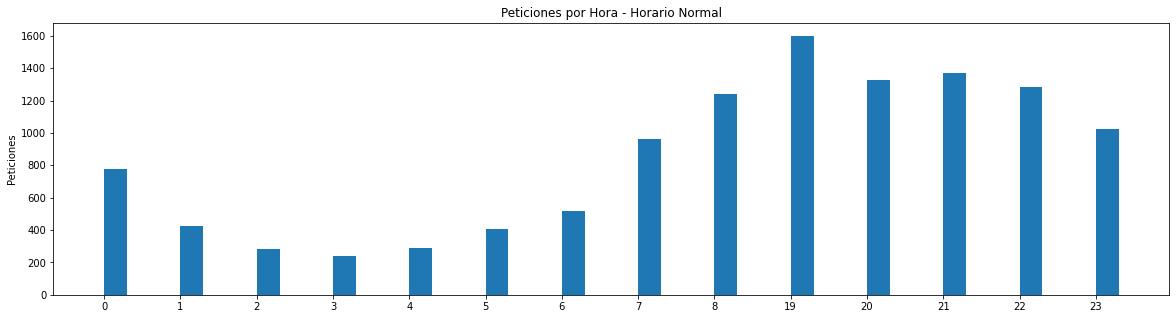

In [10]:
#@title Histograma - Horario Normal
graph(dictionary_horario_normal, "Peticiones por Hora - Horario Normal")

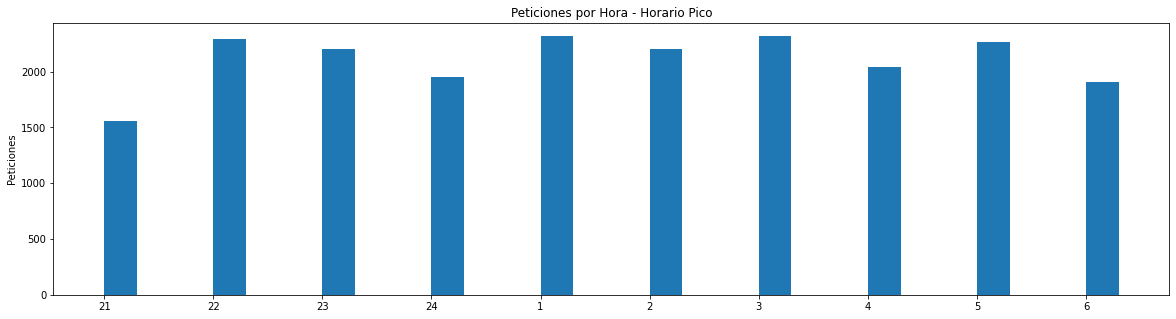

In [11]:
#@title Histograma - Horario Pico
graph(dictionary_horario_pico, "Peticiones por Hora - Horario Pico")

In [12]:
#@title Media Varianza y Desvío Estandar - Horario Pico
print_data(dictionary_horario_pico)

Media: 2106.500000
Varianza: 54045.450000
Desvío Estandar: 232.476773


In [13]:
#@title Media Varianza y Desvío Estandar - Horario Normal
print_data(dictionary_horario_normal)

Media: 838.428571
Varianza: 210451.816327
Desvío Estandar: 458.750277
